##Djebbi Hani 3IDL01-G01




















In [1]:
#imports
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
from collections import Counter

In [3]:
#1-load data from the market_basket.txt file
data = pd.read_csv("market_basket.txt",delimiter="\t")
data = data.reset_index()

In [ ]:
#2-show first 10 lines
data.iloc[0:10]

,index,ID,Product
0,0,1,Peaches
1,1,2,Vegetable_Oil
2,2,2,Frozen_Corn
3,3,3,Plums
4,4,4,Pancake_Mix
5,5,5,Cheese
6,6,6,Cauliflower
7,7,7,2pct_Milk
8,8,8,98pct_Fat_Free_Hamburger
9,9,8,Potato_Chips


In [4]:
#3- shape of the dataframe
data.shape

(12935, 3)

In [5]:
from IPython.utils.path import target_outdated
#4- print the logical matrix
#first step: i need a list of all the product (number of cols)
#to get that i will just put the values of the product col into a set and 
#the duplicates will be eleminated
products = set(data['Product'])
len(products)#303
#ok i have 303 unique products
#next i need to generate all the taransactions
#i will store each transaction in a dic where the tran id will be the key and
#the list products bought will be the value.
#O(n) time O(n) space
transactions={}
for index, row in data.iterrows():
    if row['ID'] not in transactions:
      transactions[row['ID']] = [row['Product']]
    else:
      transactions[row['ID']].append(row['Product'])
transactions
#now i will create a function that takes as a parameter a transaction ID and the
#transactions list and it will return a binary list 

def rep_tran_binary(id,transactions,products):
  res = [0] * len(products)
  prs = list(products)
  for i in range(len(products)):
    if prs[i] in  transactions[id]:
      res[i]=1
  return res

#now using this function i can build a logic matrix just by calling the func
#on each transaction we have
matrix_transactions = {}
for key, value in transactions.items():
  r= rep_tran_binary(key,transactions,products)
  matrix_transactions[key]= r

pd.DataFrame(list(matrix_transactions.values()),index=matrix_transactions.keys(),columns=products)



,Graham_Crackers,Paper_Plates,Jelly_Filled_Donuts,Creamed_Corn,Grape_Juice,Sweat_Potatoes,AA_Cell_Batteries,Beets,Lemons,Cole_Slaw,...,Hamburger_Buns,Dried_Fruit_Mix,Orange_Juice,Regular_Coffee,Toothpaste,Sandwich_Bags,Raisin_Pudding,Dried_Apples,Pancake_Mix,Frozen_Corn
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1358,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1359,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1360,0,0,1,1,0,0,1,0,0,1,...,0,0,0,0,1,1,0,0,1,0


In [6]:
cr_data = pd.crosstab([data.ID],[data.Product])
cr_data

Product,100_Watt_Lightbulb,2pct_Milk,40_Watt_Lightbulb,60_Watt_Lightbulb,75_Watt_Lightbulb,98pct_Fat_Free_Hamburger,AA_Cell_Batteries,Apple_Cinnamon_Waffles,Apple_Drink,Apple_Fruit_Roll,...,White_Bread,White_Wine,White_Zinfandel_Wine,Whole_Corn,Whole_Green_Beans,Whole_Milk,Window_Cleaner,Wood_Polish,flav_Fruit_Bars,flav_Ice
ID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1358,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1359,0,1,1,1,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0


## They are definitely the same ✅

In [7]:
#6
cr_data.iloc[0:30, 0:3]

Product,100_Watt_Lightbulb,2pct_Milk,40_Watt_Lightbulb
ID,,,
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,0,0,0
7,0,1,0
8,0,0,0
9,0,0,0


In [8]:
#init C1
c = Counter()
for p in products:
  c[p] = cr_data[p].sum()
print("C1:")
for i in c:
    print(str([i])+": "+str(c[i]))
#define a min supp = 0.65
sp = 0.025
s = int(sp*len(products))
l = Counter()
for i in c:
#check if it's a frequent itemset
    if(c[i] >= s):
        l[frozenset([i])]+=c[i]
print("L1:")
for i in l:
    print(str(list(i))+": "+str(l[i]))
print()


C1:
['Graham_Crackers']: 39
['Paper_Plates']: 43
['Jelly_Filled_Donuts']: 43
['Creamed_Corn']: 40
['Grape_Juice']: 9
['Sweat_Potatoes']: 11
['AA_Cell_Batteries']: 43
['Beets']: 39
['Lemons']: 41
['Cole_Slaw']: 54
['flav_Ice']: 51
['Sponge']: 37
['Chunky_Peanut_Butter']: 50
['Strawberry_Soda']: 9
['Matches']: 15
['Napkins']: 42
['Columbian_Coffee']: 41
['Mixed_Vegetables']: 48
['Sesame_Oil']: 28
['Tuna_Spread']: 18
['Donuts']: 44
['Manicotti']: 52
['Trash_Bags']: 42
['Mint_Chocolate_Bar']: 30
['Rye_Bread']: 37
['Fruit_Drink']: 42
['Hot_Chocolate']: 46
['French_Fries']: 80
['Chardonnay_Wine']: 45
['Sour_Cream']: 69
['Cheese_Crackers']: 54
['Shrimp_Cocktail_Sauce']: 55
['Chicken_Breast_-_Frozen']: 44
['Fresh_Lima_Beans']: 10
['Grape_Jam']: 41
['Apple_Sauce']: 44
['Wood_Polish']: 32
['Turkey_Noodle_Soup']: 34
['Bubble_Gum']: 48
['Eggs']: 167
['Waffles']: 70
['Green_Pepper']: 45
['Whole_Green_Beans']: 30
['Red_Pepper']: 43
['Orange_flav_Fruit_Bars']: 63
['Taco_Salad']: 27
['Summer_Sausage']

In [ ]:
pl = l
pos = 1
#limit itemset size to 4 as requested
for count in range (2,4):
    nc = set()
    temp = list(l)
    for i in range(0,len(temp)):
        for j in range(i+1,len(temp)):
            t = temp[i].union(temp[j])
            if(len(t) == count):
                nc.add(temp[i].union(temp[j]))
    nc = list(nc)
    c = Counter()
    for i in nc:
        c[i] = 0
        for q in transactions.values():
            temp = set(q)
            if(i.issubset(temp)):
                c[i]+=1
    print("C"+str(count)+":")
    for i in c:
        print(str(list(i))+": "+str(c[i]))
    print()
    l = Counter()
    for i in c:
        if(c[i] >= s):
            l[i]+=c[i]
    print("L"+str(count)+":")
    for i in l:
        print(str(list(i))+": "+str(l[i]))
    print()
    if(len(l) == 0):
        break
    pl = l
    pos = count
print("Result: ")
print("L"+str(pos)+":")
for i in pl:
    print(str(list(i))+": "+str(pl[i]))
print()

the algo above is not that efficient it takes too long since it calculates the supp for each subset

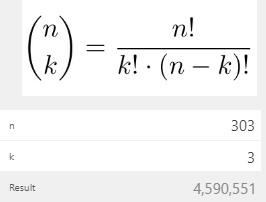
so i will use the apriori built in function

In [9]:
#to check if a set is a subset of another set we can juste use issubset() method
#or we can just calculate occurrence of elements in the smaller set in dic then go through the bigger set and check if the eliment i is in the dic then -- its value 
#at the end just check if all the values in the dic are 0 or negative 
def is_inclus(A,B):
  """ check if A is a subset of B
  """
  c = Counter(A)
  for el in B:
    if el in c:
      c[el]-=1
  return sum(c.values())<=0

is_inclus({1,2,3},{1,5,6,82,3})

False

In [10]:
frq_items = apriori(cr_data, min_support = 0.025, use_colnames = True)
frq_items.head(15)


,support,itemsets
0,0.030147,(100_Watt_Lightbulb)
1,0.109559,(2pct_Milk)
2,0.037500,(60_Watt_Lightbulb)
3,0.031618,(75_Watt_Lightbulb)
4,0.093382,(98pct_Fat_Free_Hamburger)
5,0.031618,(AA_Cell_Batteries)
6,0.025735,(Apple_Cinnamon_Waffles)
7,0.026471,(Apple_Drink)
8,0.031618,(Apple_Fruit_Roll)
9,0.032353,(Apple_Jam)


In [11]:
s = frq_items.itemsets
#itemsets that contains Aspirin
print('-'*13,'itemsets  that contains Aspirin','-'*13)
for i in s:
  if 'Aspirin' in i:
    print(list(i))
print('-'*13,'itemsets  that contains Aspirin and egges','-'*13)
#itemsets that contains Aspirin and Eggs
for i in s:
  if ('Aspirin' in i) and ('Eggs' in i):
    print(list(i))

------------- itemsets  that contains Aspirin -------------
['Aspirin']
['2pct_Milk', 'Aspirin']
['Aspirin', '98pct_Fat_Free_Hamburger']
['Cola', 'Aspirin']
['Aspirin', 'Domestic_Beer']
['Eggs', 'Aspirin']
['Aspirin', 'Hot_Dogs']
['Onions', 'Aspirin']
['Aspirin', 'Pepperoni_Pizza_-_Frozen']
['Popcorn_Salt', 'Aspirin']
['Potato_Chips', 'Aspirin']
['Potatoes', 'Aspirin']
['Aspirin', 'Sweet_Relish']
['Toilet_Paper', 'Aspirin']
['Tomatoes', 'Aspirin']
['Toothpaste', 'Aspirin']
['Wheat_Bread', 'Aspirin']
['White_Bread', 'Aspirin']
['Eggs', '2pct_Milk', 'Aspirin']
['Potato_Chips', '2pct_Milk', 'Aspirin']
['White_Bread', '2pct_Milk', 'Aspirin']
['Eggs', 'Potato_Chips', 'Aspirin']
['Eggs', 'White_Bread', 'Aspirin']
['White_Bread', 'Potato_Chips', 'Aspirin']
['Potatoes', 'White_Bread', 'Aspirin']
['Toothpaste', 'Aspirin', 'White_Bread']
------------- itemsets  that contains Aspirin and egges -------------
['Eggs', 'Aspirin']
['Eggs', '2pct_Milk', 'Aspirin']
['Eggs', 'Potato_Chips', 'Aspirin']
[

In [12]:
rules = association_rules(frq_items, metric ="confidence", min_threshold = 0.75)
rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(Aspirin, 2pct_Milk)",(White_Bread),0.034559,0.119118,0.027206,0.787234,6.608878,0.023089,4.140147
1,"(Bananas, White_Bread)",(2pct_Milk),0.032353,0.109559,0.025735,0.795455,7.260525,0.022191,4.353268
2,"(Bananas, 2pct_Milk)",(White_Bread),0.031618,0.119118,0.025735,0.813953,6.833190,0.021969,4.734743
3,"(Cola, Wheat_Bread)",(2pct_Milk),0.032353,0.109559,0.025735,0.795455,7.260525,0.022191,4.353268
4,"(Popcorn_Salt, 2pct_Milk)",(Eggs),0.033088,0.122794,0.027206,0.822222,6.695941,0.023143,4.934283


In [13]:
rules[rules.lift>7]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,"(Bananas, White_Bread)",(2pct_Milk),0.032353,0.109559,0.025735,0.795455,7.260525,0.022191,4.353268
3,"(Cola, Wheat_Bread)",(2pct_Milk),0.032353,0.109559,0.025735,0.795455,7.260525,0.022191,4.353268
8,"(Onions, Wheat_Bread)",(2pct_Milk),0.034559,0.109559,0.028676,0.829787,7.573897,0.024890,5.231342
10,"(Potatoes, Wheat_Bread)",(2pct_Milk),0.032353,0.109559,0.025000,0.772727,7.053081,0.021455,3.917941
13,"(Toothpaste, Wheat_Bread)",(2pct_Milk),0.034559,0.109559,0.027941,0.808511,7.379694,0.024155,4.650082
16,"(White_Bread, Hamburger_Buns)",(98pct_Fat_Free_Hamburger),0.034559,0.093382,0.026471,0.765957,8.202379,0.023243,3.873730
17,"(Wheat_Bread, 98pct_Fat_Free_Hamburger)",(White_Bread),0.029412,0.119118,0.026471,0.900000,7.555556,0.022967,8.808824
29,"(Hot_Dog_Buns, Sweet_Relish)",(Hot_Dogs),0.036029,0.092647,0.030147,0.836735,9.031422,0.026809,5.557537
35,"(Toilet_Paper, Potatoes)",(White_Bread),0.028676,0.119118,0.025000,0.871795,7.318772,0.021584,6.870882
37,"(Toilet_Paper, Toothpaste)",(White_Bread),0.029412,0.119118,0.025735,0.875000,7.345679,0.022232,7.047059


In [14]:
rules[rules.consequents.str.contains('2pct_Milk', na=False)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
